In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from matplotlib import pyplot as plt
import seaborn as sns



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')
print(df.head())
print(df.info())
print(df.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [ ]:
print("Check null values:")
print(df.isnull().sum)
df.dropna(inplace=True)

Check null values:
<bound method DataFrame.sum of      price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    False  False     False      False    False     False      False   
1    False  False     False      False    False     False      False   
2    False  False     False      False    False     False      False   
3    False  False     False      False    False     False      False   
4    False  False     False      False    False     False      False   
..     ...    ...       ...        ...      ...       ...        ...   
540  False  False     False      False    False     False      False   
541  False  False     False      False    False     False      False   
542  False  False     False      False    False     False      False   
543  False  False     False      False    False     False      False   
544  False  False     False      False    False     False      False   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0       False  

In [ ]:
le_mainroad=LabelEncoder()
le_guestroom=LabelEncoder()
le_basement=LabelEncoder()
le_hotwaterheating=LabelEncoder()
le_airconditioning=LabelEncoder()
le_prefarea=LabelEncoder()
le_furnishingstatus=LabelEncoder()


In [ ]:
df['mainroad']=le_mainroad.fit_transform(df['mainroad'])
df['guestroom']=le_guestroom.fit_transform(df['guestroom'])
df['basement']=le_basement.fit_transform(df['basement'])
df['hotwaterheating']=le_hotwaterheating.fit_transform(df['hotwaterheating'])
df['airconditioning']=le_airconditioning.fit_transform(df['airconditioning'])
df['prefarea']=le_prefarea.fit_transform(df['prefarea'])
df['furnishingstatus']=le_furnishingstatus.fit_transform(df['furnishingstatus'])

In [ ]:
X=df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y=df['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Squared Error: 807848838640.2026
R2 Score: 0.7624579467323476


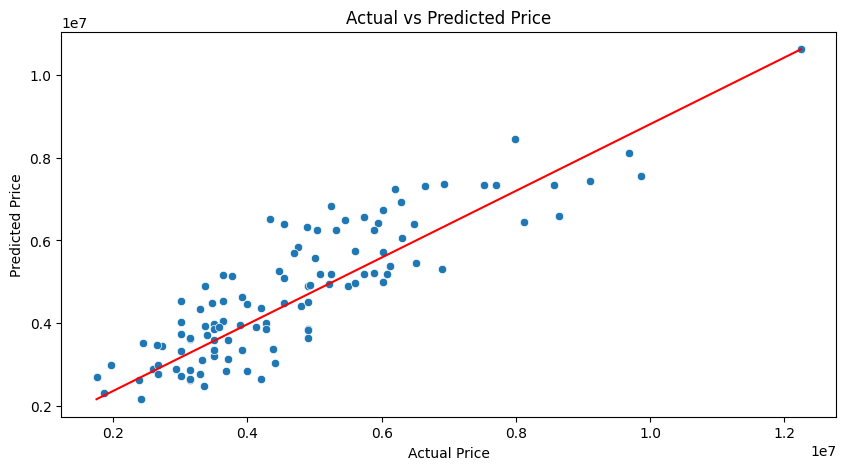

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test,y=y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()